<a href="https://colab.research.google.com/github/laaledesiempre/machine_learning_PW/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Librerias de visualizacion y proceso de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Herramientas para machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
!wget --quiet https://raw.githubusercontent.com/laaledesiempre/machine_learning_PW/main/archive.zip #Contiene la flag quiet para que no de output

In [3]:
!unzip archive.zip #Descomprimimos el Zip

Archive:  archive.zip
  inflating: water_potability.csv    


---
# Dataset

Para este trabajo utilizaremos un dataset sobre la potabilidad del agua, que toma ciertos parametros para determinar si el agua es o no apta para consumo.

In [4]:
dt = pd.read_csv("./water_potability.csv")

In [5]:
dt.head(5) # Un pequeño ejemplo del dataset

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [6]:
dt.info() # Algunos datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Encontramos que las columnas ph y Sulfate tienen muchos NaN. ahora vamos a evaluar que se va a hacer con esos datos:  

In [7]:
dt.describe() # y estadisticas

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

> Respecto a los datos, se puede ver que la media del surlfato es bastante alta (a aprox 150 unidades de su maximo), estando su minima a 129 (a 200), evaluamos que seria posible cambiar su valor por su media.
> No obstante, la cantidad de datos es extremadamente alta, y consideramos que podria llegar a perjudicar al aprendizaje el hecho de que haya tantos valores iguales, por lo que decidimos directamente sacarlo
> En cambio en ph, la media esta justo en la media de los dos valores, por lo que consideramos que poner el valor medio seria muy general y, al ser tan grande la cantidad de datos, podria llegar a perjudicar significativamente al dataframe, por lo que decidimos eliminar los na apartir de ello, el mismo criterio tomamos con los Trihalomethanes.


In [8]:
dt_base= dt.copy() #Guardamos el dataframe sin modificar por si lo necesitamos mas adelante

dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
# Ahora sacamos los na
dt=dt.dropna()
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


## Tambien vamos a normalizar los datos:


In [10]:
min_max_scaler= MinMaxScaler()
datos_normalizados = min_max_scaler.fit_transform(dt)
dt.columns
dt = pd.DataFrame(datos_normalizados, columns=dt.columns)
dt.head(5)

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.587349  0.577747  0.386298     0.568199  0.647347      0.292985   
1  0.643654  0.441300  0.314381     0.439304  0.514545      0.356685   
2  0.388934  0.470876  0.506122     0.524364  0.561537      0.142913   
3  0.725820  0.715942  0.506141     0.521683  0.751819      0.148683   
4  0.610517  0.532588  0.237701     0.270288  0.495155      0.494792   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0        0.654522         0.795029   0.630115         0.0  
1        0.377248         0.202914   0.520358         0.0  
2        0.249922         0.401487   0.219973         0.0  
3        0.467200         0.658678   0.242428         0.0  
4        0.409721         0.469762   0.585049         0.0

<Axes: >

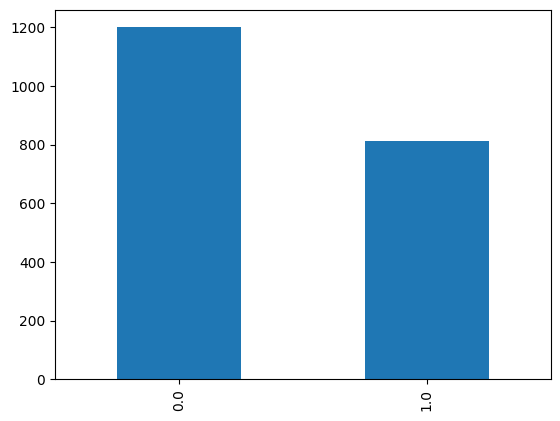

In [11]:
dt['Potability'].value_counts().plot(kind="bar")

> Vamos a ver las relaciones para evaluar la reelevancia de los datos a simple vista y empezar a sacar concluciones.

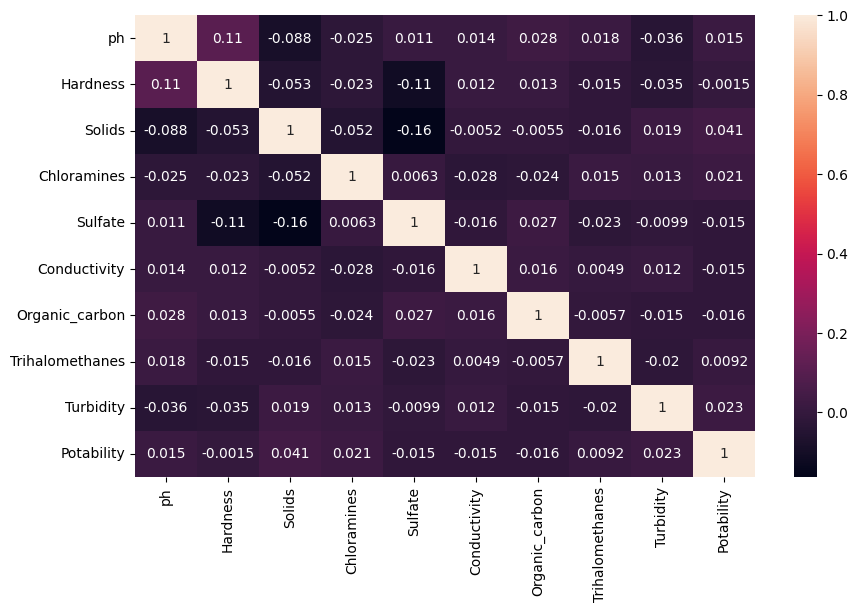

In [12]:
sns.heatmap(data=dt.corr(), annot=True)

fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

### Que conclusiones podemos extraer de este mapa de calor?
---
Pareciera que todos los datos tienen relaciones **similares**, esto podria significar que todos tienen una reelevancia similar, no parece haber algun dato con poca coorelacion con todos, solo casos aislados como el del sulfato con solidos y con la dureza del agua. o los solidos y el ph.
Lo que si se puede ver es la gran similitud entre ph y dureza.

Una busqueda en google nos lleva a la Sociedad Acuariologica de La Plata, que indica que si bien existe una relacion entre los dos valores, esta puede no ser tan lineal. por lo que consideramos mantener los dos.

[Fuente](https://www.sadelplata.org/articulos/guerrero_060902.html)

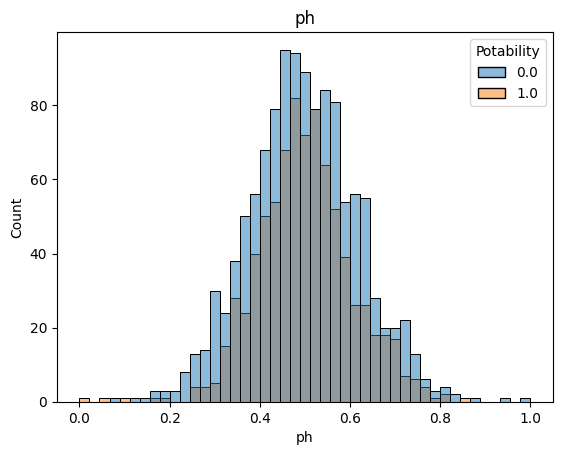

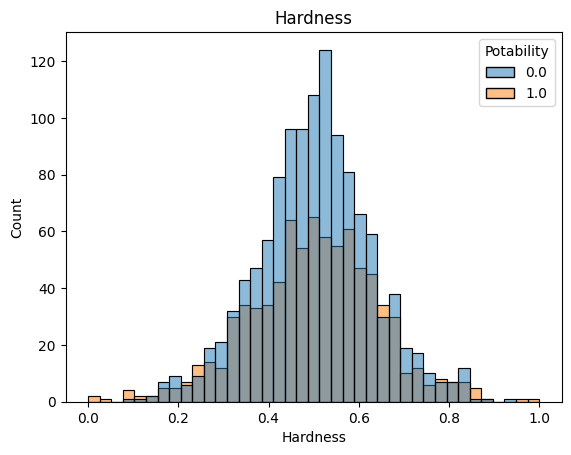

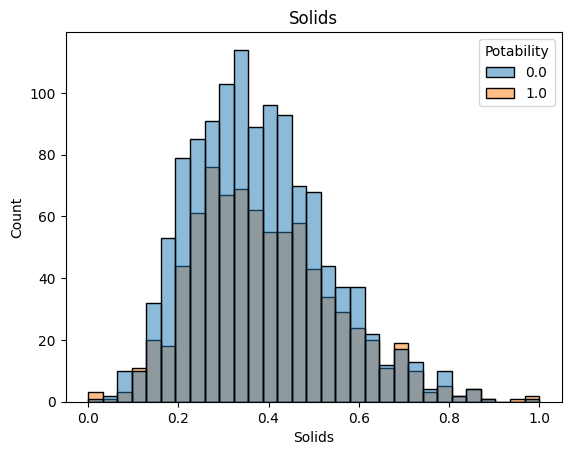

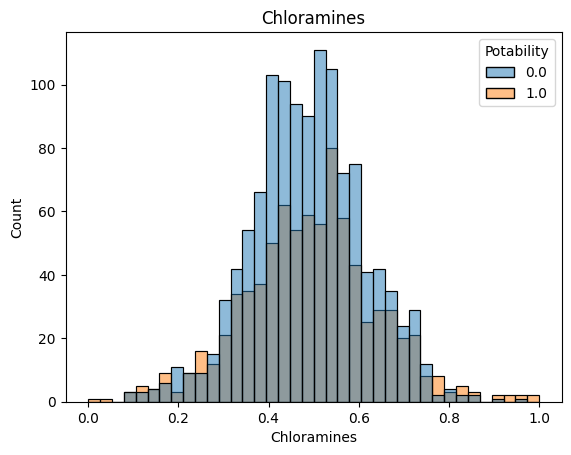

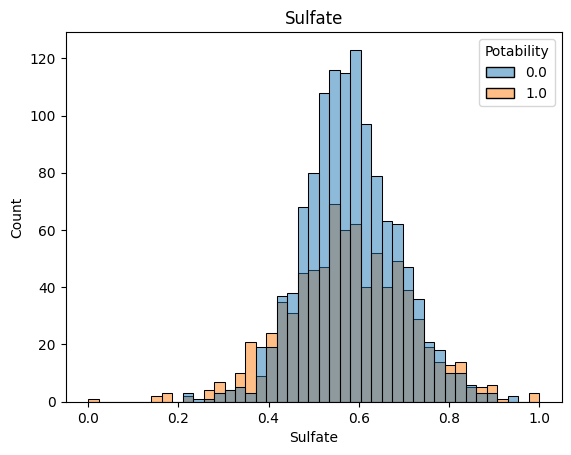

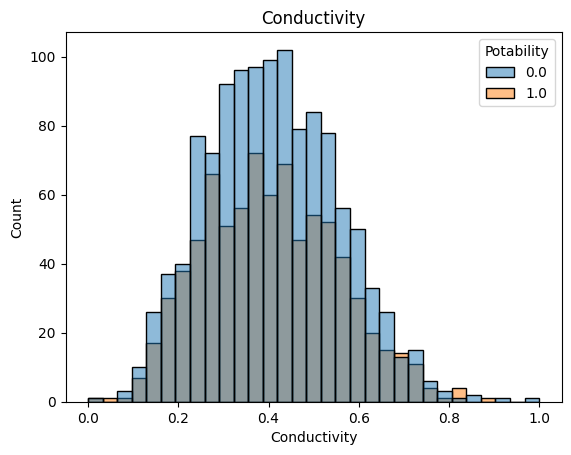

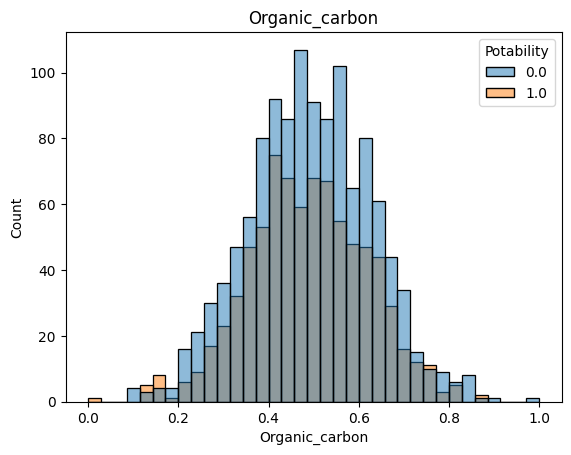

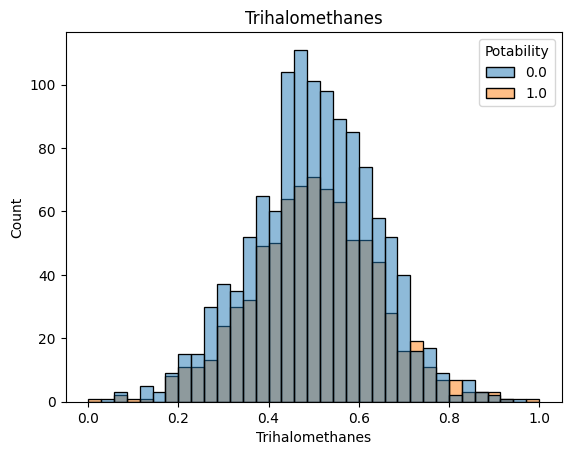

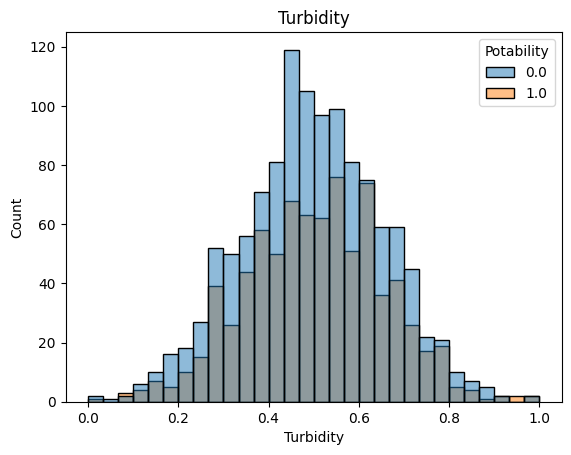

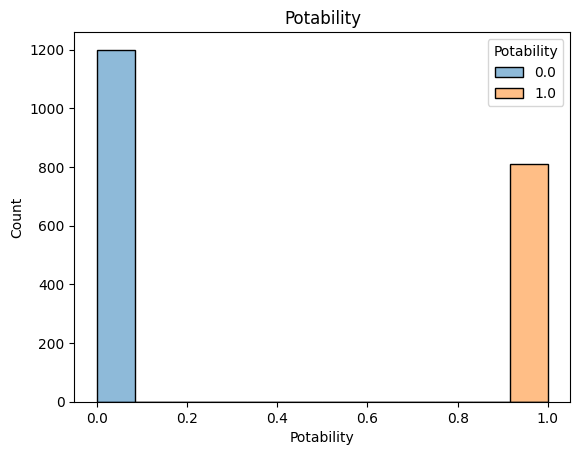

In [13]:
for col in dt.columns:
    plt.title(col)
    sns.histplot(data=dt, x = col, hue='Potability')
    plt.show()

> Estas graficas de distribucion son interesantes, la forma de campana de Gauss indica que la mayoria de los datos tiene una distribucion similar, y casos extremos mas aislados, un analisis que se podria hacer a futuro es si los casos mas extremos son verdaderamente reelevantes, ya que son pocos, y bastante distribuidos entre potabilidad y no potabilidad.

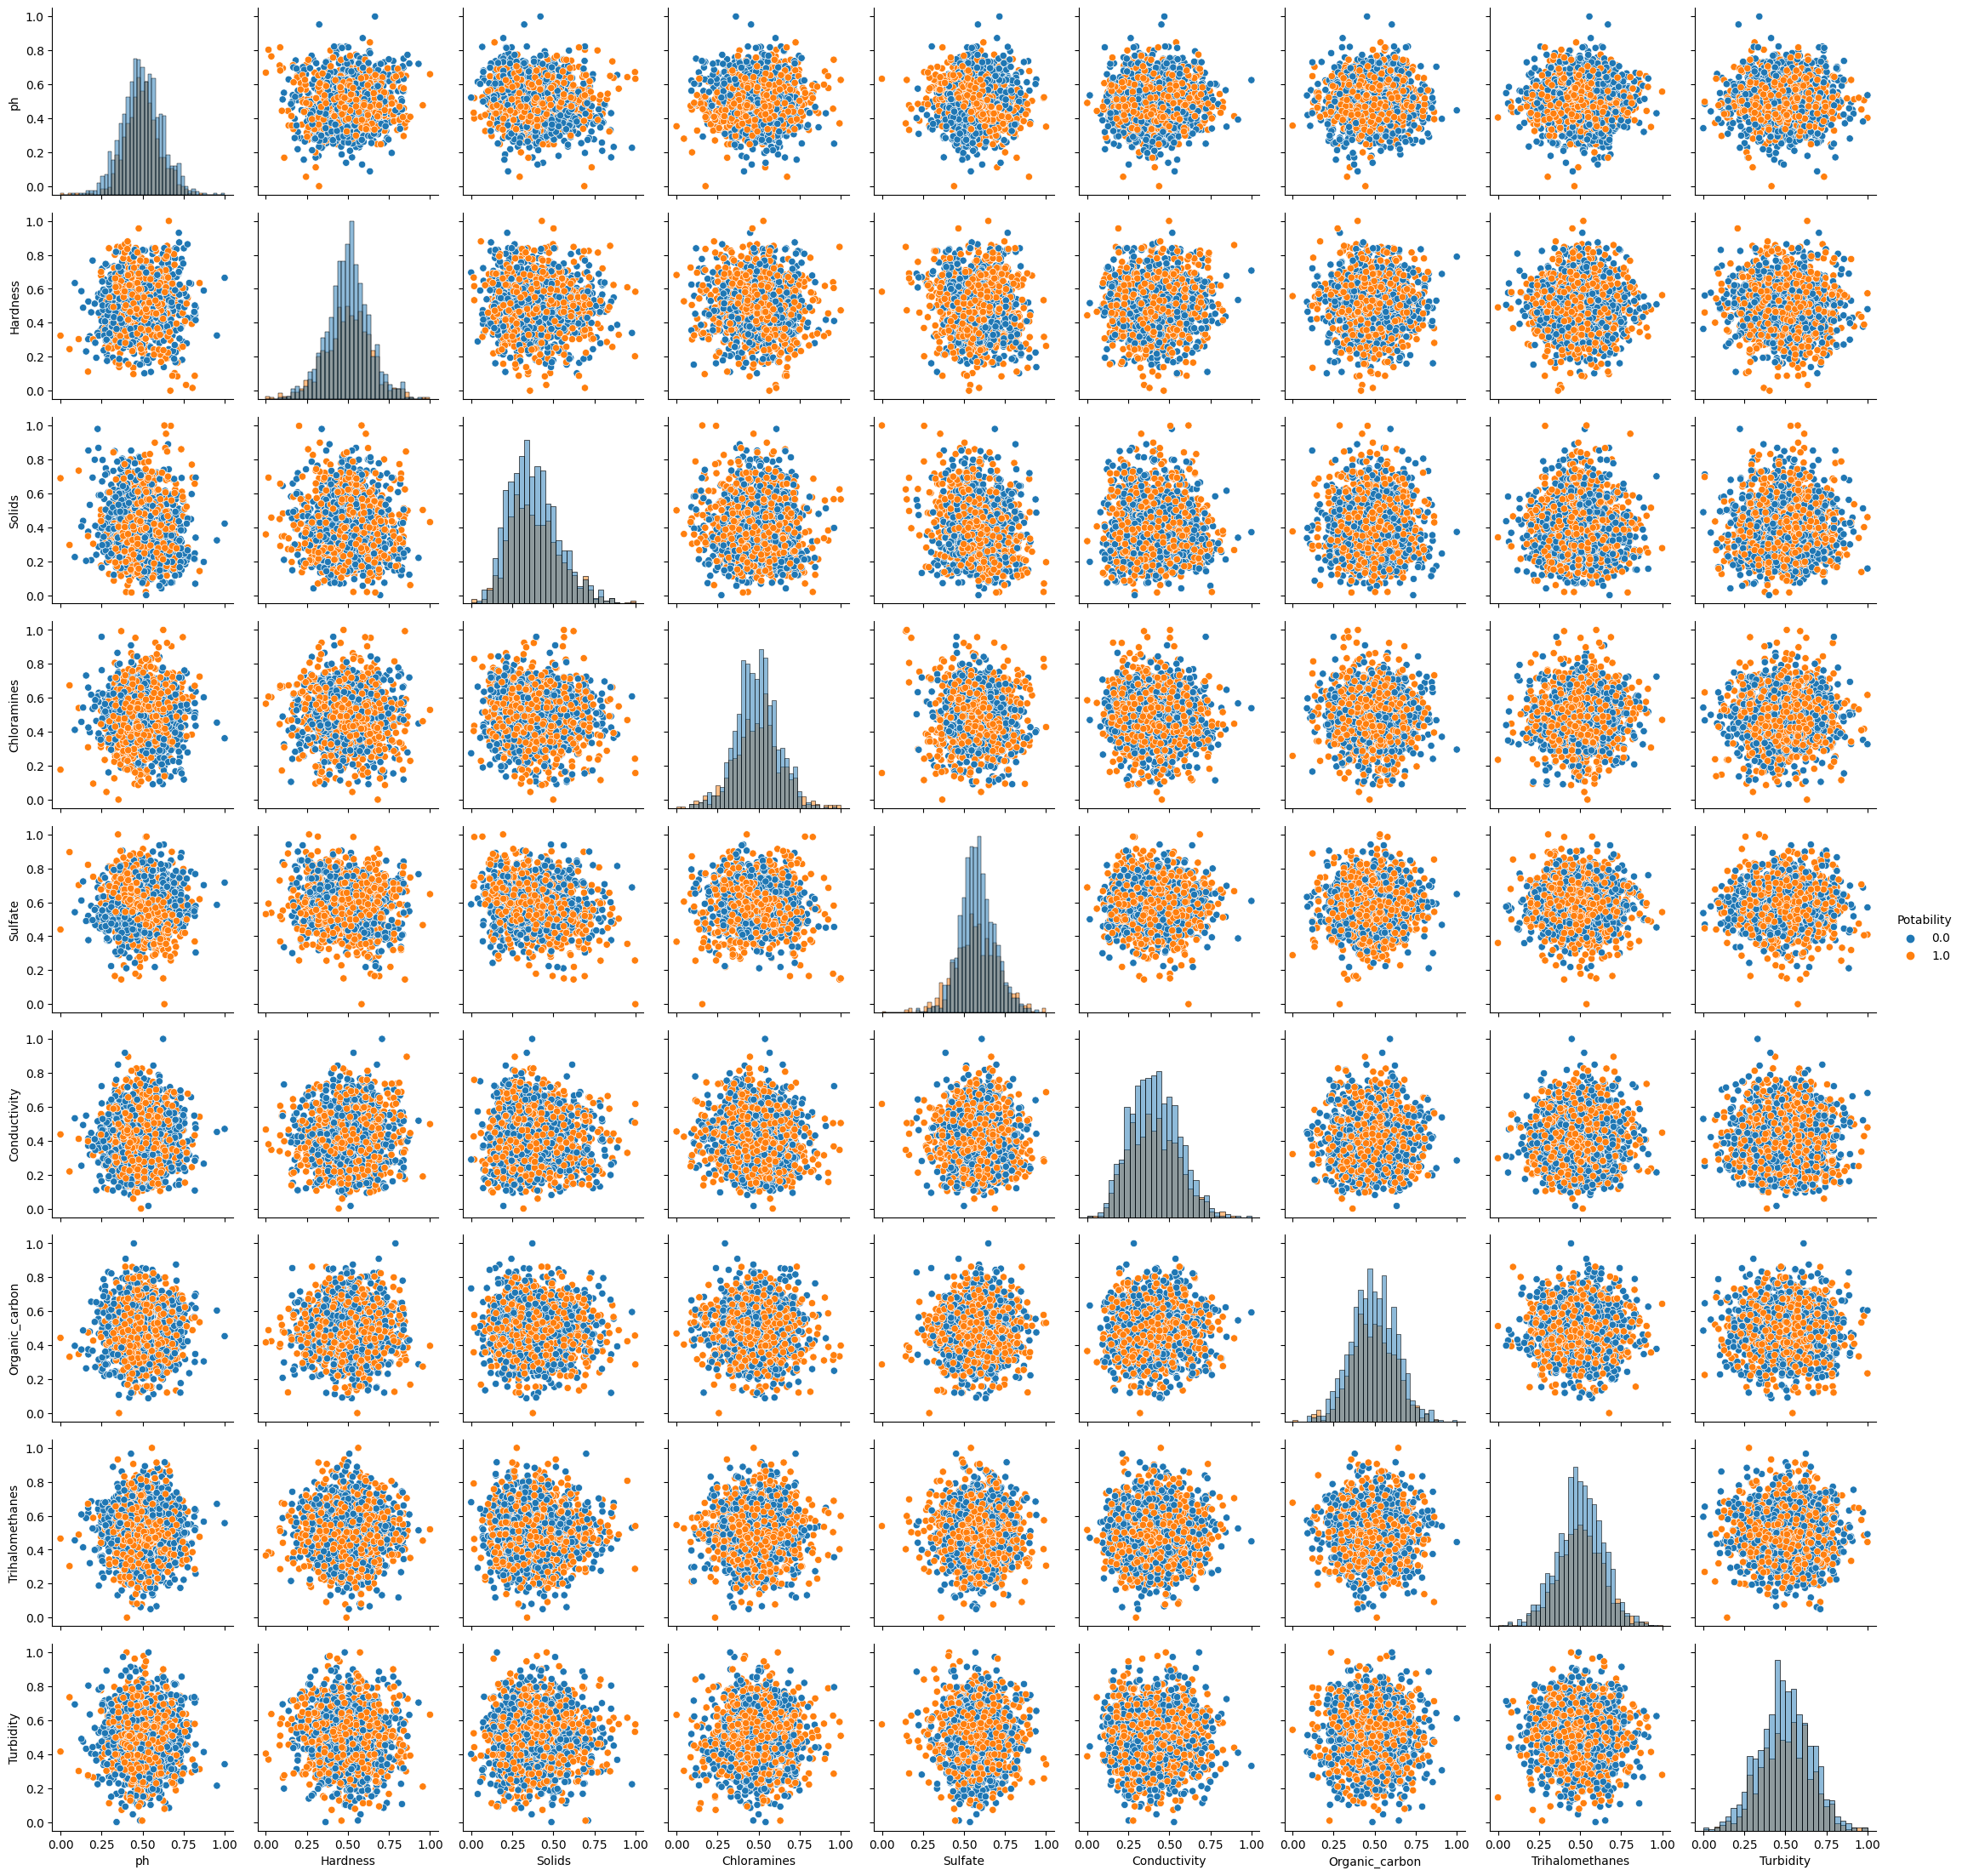

In [14]:
g = sns.PairGrid(dt, hue="Potability") # tarda mucho y no tiene reelevancia su ejecusion, podria interesarle no ejecutarlo
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

> Este grafico refuerza bastante la idea de que es bastante distribuida y similar la relacion de datos, todos los graficos se centran en puntos medios y no en extremos a excepcion de casos particulares, y no se ve una posicion clara respecto a donde se encuntran los potables y los no potables en la mayoria de graficos. no se encuentrar muy segregados en la mayoria de las comparaciones.

---
# Finalizada la exploracion de datos, vamos a prepararlos
---

In [15]:
print(dt.head())
y = dt.pop('Potability') #aca sacamos la potabilidad
print(dt.head())
# Ahora tenemos guardado en Y los resultados
y


         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.587349  0.577747  0.386298     0.568199  0.647347      0.292985   
1  0.643654  0.441300  0.314381     0.439304  0.514545      0.356685   
2  0.388934  0.470876  0.506122     0.524364  0.561537      0.142913   
3  0.725820  0.715942  0.506141     0.521683  0.751819      0.148683   
4  0.610517  0.532588  0.237701     0.270288  0.495155      0.494792   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0        0.654522         0.795029   0.630115         0.0  
1        0.377248         0.202914   0.520358         0.0  
2        0.249922         0.401487   0.219973         0.0  
3        0.467200         0.658678   0.242428         0.0  
4        0.409721         0.469762   0.585049         0.0  
         ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.587349  0.577747  0.386298     0.568199  0.647347      0.292985   
1  0.643654  0.441300  0.314381     0.439304  0.514545      0.3

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2006    1.0
2007    1.0
2008    1.0
2009    1.0
2010    1.0
Name: Potability, Length: 2011, dtype: float64

In [16]:
print(y.shape)
print(dt.shape)
print(f"y{y.shape} y dt{dt.shape} tienen la misma cantidad de filas pero diferente cantidad de columnas") if y.shape[0] == dt.shape[0] else print("NO tienen la misma cantidad de filas")

(2011,)
(2011, 9)
y(2011,) y dt(2011, 9) tienen la misma cantidad de filas pero diferente cantidad de columnas


In [17]:
X = np.asarray(dt) # Convertimos dt en un array de numpy para crear los datos
print(X)

[[0.58734916 0.57774671 0.38629788 ... 0.65452157 0.79502934 0.63011476]
 [0.64365393 0.44130035 0.31438058 ... 0.37724796 0.20291434 0.52035803]
 [0.38893354 0.47087564 0.50612238 ... 0.24992171 0.40148717 0.21997295]
 ...
 [0.81782618 0.08743355 0.65638906 ... 0.56326524 0.28574454 0.5786739 ]
 [0.42418706 0.4640915  0.45965606 ... 0.39778031 0.44915584 0.44000443]
 [0.32242529 0.49289123 0.84140928 ... 0.47142165 0.50345848 0.59186714]]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [19]:
X_train.shape

(1809, 9)

In [20]:
X_test.shape

(202, 9)

In [21]:
y_train.shape

(1809,)

In [22]:
y_test.shape

(202,)

## Empezando a probar modelos:
---
> ### 1) Regresion Logica

In [23]:
# Métricas y desempeño
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Grafica Matrix de confusión

In [24]:
# Modelos para clasificación
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression()    # Se instancia el modelo, parámetros por defecto
modelo_lr.fit(X_train, y_train)   # Datos para entrenar, Entrada y Salida.

pred_lr = modelo_lr.predict(X_test)   # Con la Entrada para test, se evalúa la predicción de Clase del modelo

In [25]:
print("Reporte de Clasificación: \n", classification_report(y_test, pred_lr))   # Se computan métricas comparando lo que debería de ser la salida con lo que predijo el modelo

Reporte de Clasificación: 
               precision    recall  f1-score   support

         0.0       0.63      0.99      0.77       127
         1.0       0.00      0.00      0.00        75

    accuracy                           0.62       202
   macro avg       0.31      0.50      0.38       202
weighted avg       0.39      0.62      0.48       202



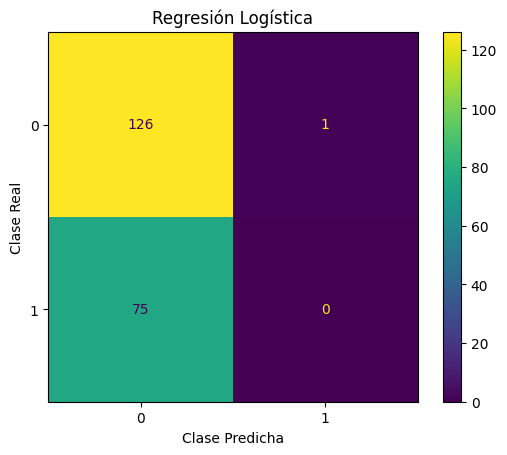

In [26]:

def plot_confusion_matrix(y_true, y_preds, labels=None, model_name=None, normalize=None):
    """
    Función para graficar la Matrix de confusión
    y_true: vector de salida real
    y_predic: vector de salida predicho por el modelo
    labels: opcional, para nombrar las clases. Lista con strings
    model_name: opcional, para poner un título al gráfico
    normalize: {'true', 'pred', 'all'}, default=None
        Normalizes confusion matrix over the true (rows), predicted (columns)
        conditions or all the population. If None, confusion matrix will not be
        normalized.
    """
    if normalize:
        cm = confusion_matrix(y_true, y_preds, normalize=normalize)
    else:
        cm = confusion_matrix(y_true, y_preds)
    cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
    cmd.plot()
    cmd.ax_.set(xlabel='Clase Predicha', ylabel='Clase Real')
    if model_name:
        cmd.ax_.set(title=model_name)


plot_confusion_matrix(y_test, pred_lr, model_name="Regresión Logística")

> Con la regresion logica, automaticamente nos dio todos como si fueran no potables, vamos a analizar si esto es debido a que no es el modelo idoneo, o si es por que los datos no son idoneos para clasificacion

In [27]:
print(pred_lr)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


---
# Arbol ecologico
---


In [28]:
from sklearn.tree import DecisionTreeClassifier

# Entrenamiento
tree_clf = DecisionTreeClassifier(random_state=1)
tree_clf.fit(X_train, y_train)

# Predicciones
pred_tree = tree_clf.predict(X_test)
print("Reporte de Clasificación: \n", classification_report(y_test, pred_tree))

Reporte de Clasificación: 
               precision    recall  f1-score   support

         0.0       0.73      0.70      0.71       127
         1.0       0.53      0.56      0.54        75

    accuracy                           0.65       202
   macro avg       0.63      0.63      0.63       202
weighted avg       0.65      0.65      0.65       202



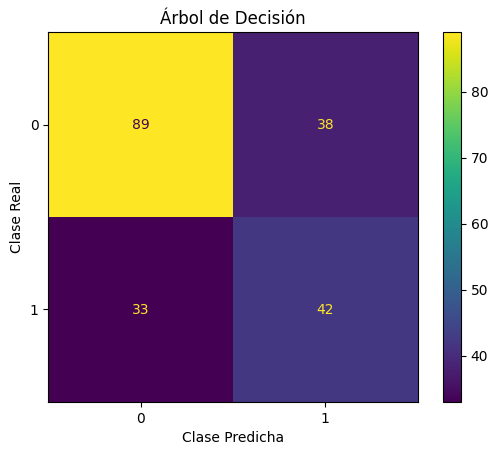

In [29]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_tree, model_name="Árbol de Decisión")

> Genial, podemos ver una mejora, pero, sigue habiendo una gran cantidad de errores, aun asi, parece ir muchisimo mejor!

In [30]:
tree_clf.feature_importances_ # Importancia de cada valor

array([0.1393506 , 0.15116241, 0.08979109, 0.13535323, 0.14278936,
       0.07902999, 0.08481555, 0.07990942, 0.09779834])

In [31]:
dt.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [42]:
# Aca podemos ver un dataframe con la importancia de cada uno
tree_importance_data=[]
for x in range(len(dt.columns)):
  tree_importance_data.append([dt.columns[x],tree_clf.feature_importances_[x]])
print(tree_importance_data)
pd.DataFrame(tree_importance_data, columns=["label","importance"]).sort_values(by="importance", ascending=False)

[['ph', 0.13935059766562471], ['Hardness', 0.151162410668931], ['Solids', 0.0897910904350378], ['Chloramines', 0.13535323432572807], ['Sulfate', 0.1427893644891972], ['Conductivity', 0.07902998906167083], ['Organic_carbon', 0.08481555377431808], ['Trihalomethanes', 0.07990942211939094], ['Turbidity', 0.09779833746010136]]


label  importance
1         Hardness    0.151162
4          Sulfate    0.142789
0               ph    0.139351
3      Chloramines    0.135353
8        Turbidity    0.097798
2           Solids    0.089791
6   Organic_carbon    0.084816
7  Trihalomethanes    0.079909
5     Conductivity    0.079030

Vemos que la importancia de Trihalomethanes es baja, sabemos que este dato nos aportaba algunos nulos, podriamos deshacernos de el y probar este mismo algoritmo denuevo

In [95]:


dt = dt_base.copy()
dt = dt.drop(columns=["Trihalomethanes"])
dt = dt.dropna()
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 3 to 3271
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ph              2116 non-null   float64
 1   Hardness        2116 non-null   float64
 2   Solids          2116 non-null   float64
 3   Chloramines     2116 non-null   float64
 4   Sulfate         2116 non-null   float64
 5   Conductivity    2116 non-null   float64
 6   Organic_carbon  2116 non-null   float64
 7   Turbidity       2116 non-null   float64
 8   Potability      2116 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 165.3 KB


In [96]:
y = dt.pop('Potability') #aca sacamos la potabilidad

# Ahora tenemos guardado en Y los resultados
X = np.asarray(dt) # Convertimos dt en un array de numpy para crear los datos


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
us = NearMiss(ratio=0.5, n_neighbors=3, version=2, random_state=1)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

In [98]:
# Entrenamiento
tree_clf = DecisionTreeClassifier(random_state=1, max_depth=9)
tree_clf.fit(X_train, y_train)

# Predicciones
pred_tree = tree_clf.predict(X_test)
print("Reporte de Clasificación: \n", classification_report(y_test, pred_tree))

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.71      0.85      0.78       135
           1       0.61      0.40      0.48        77

    accuracy                           0.69       212
   macro avg       0.66      0.63      0.63       212
weighted avg       0.68      0.69      0.67       212



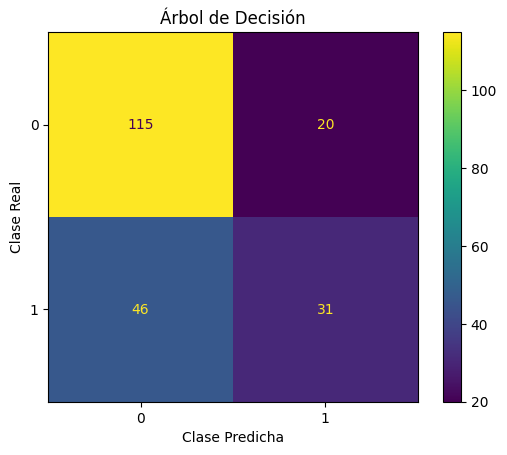

In [99]:
# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_tree, model_name="Árbol de Decisión")

Realizamos varias pruebas cambiando el random state para ver diferentes resultados y todos siguen masomenos una misma linea, analicemos el arbol para ver como resulto la clasificacion

podemos ver que el arbol es inmenso, esto se condice con varios resultados iguales, puede tratarse de un sobreajuste

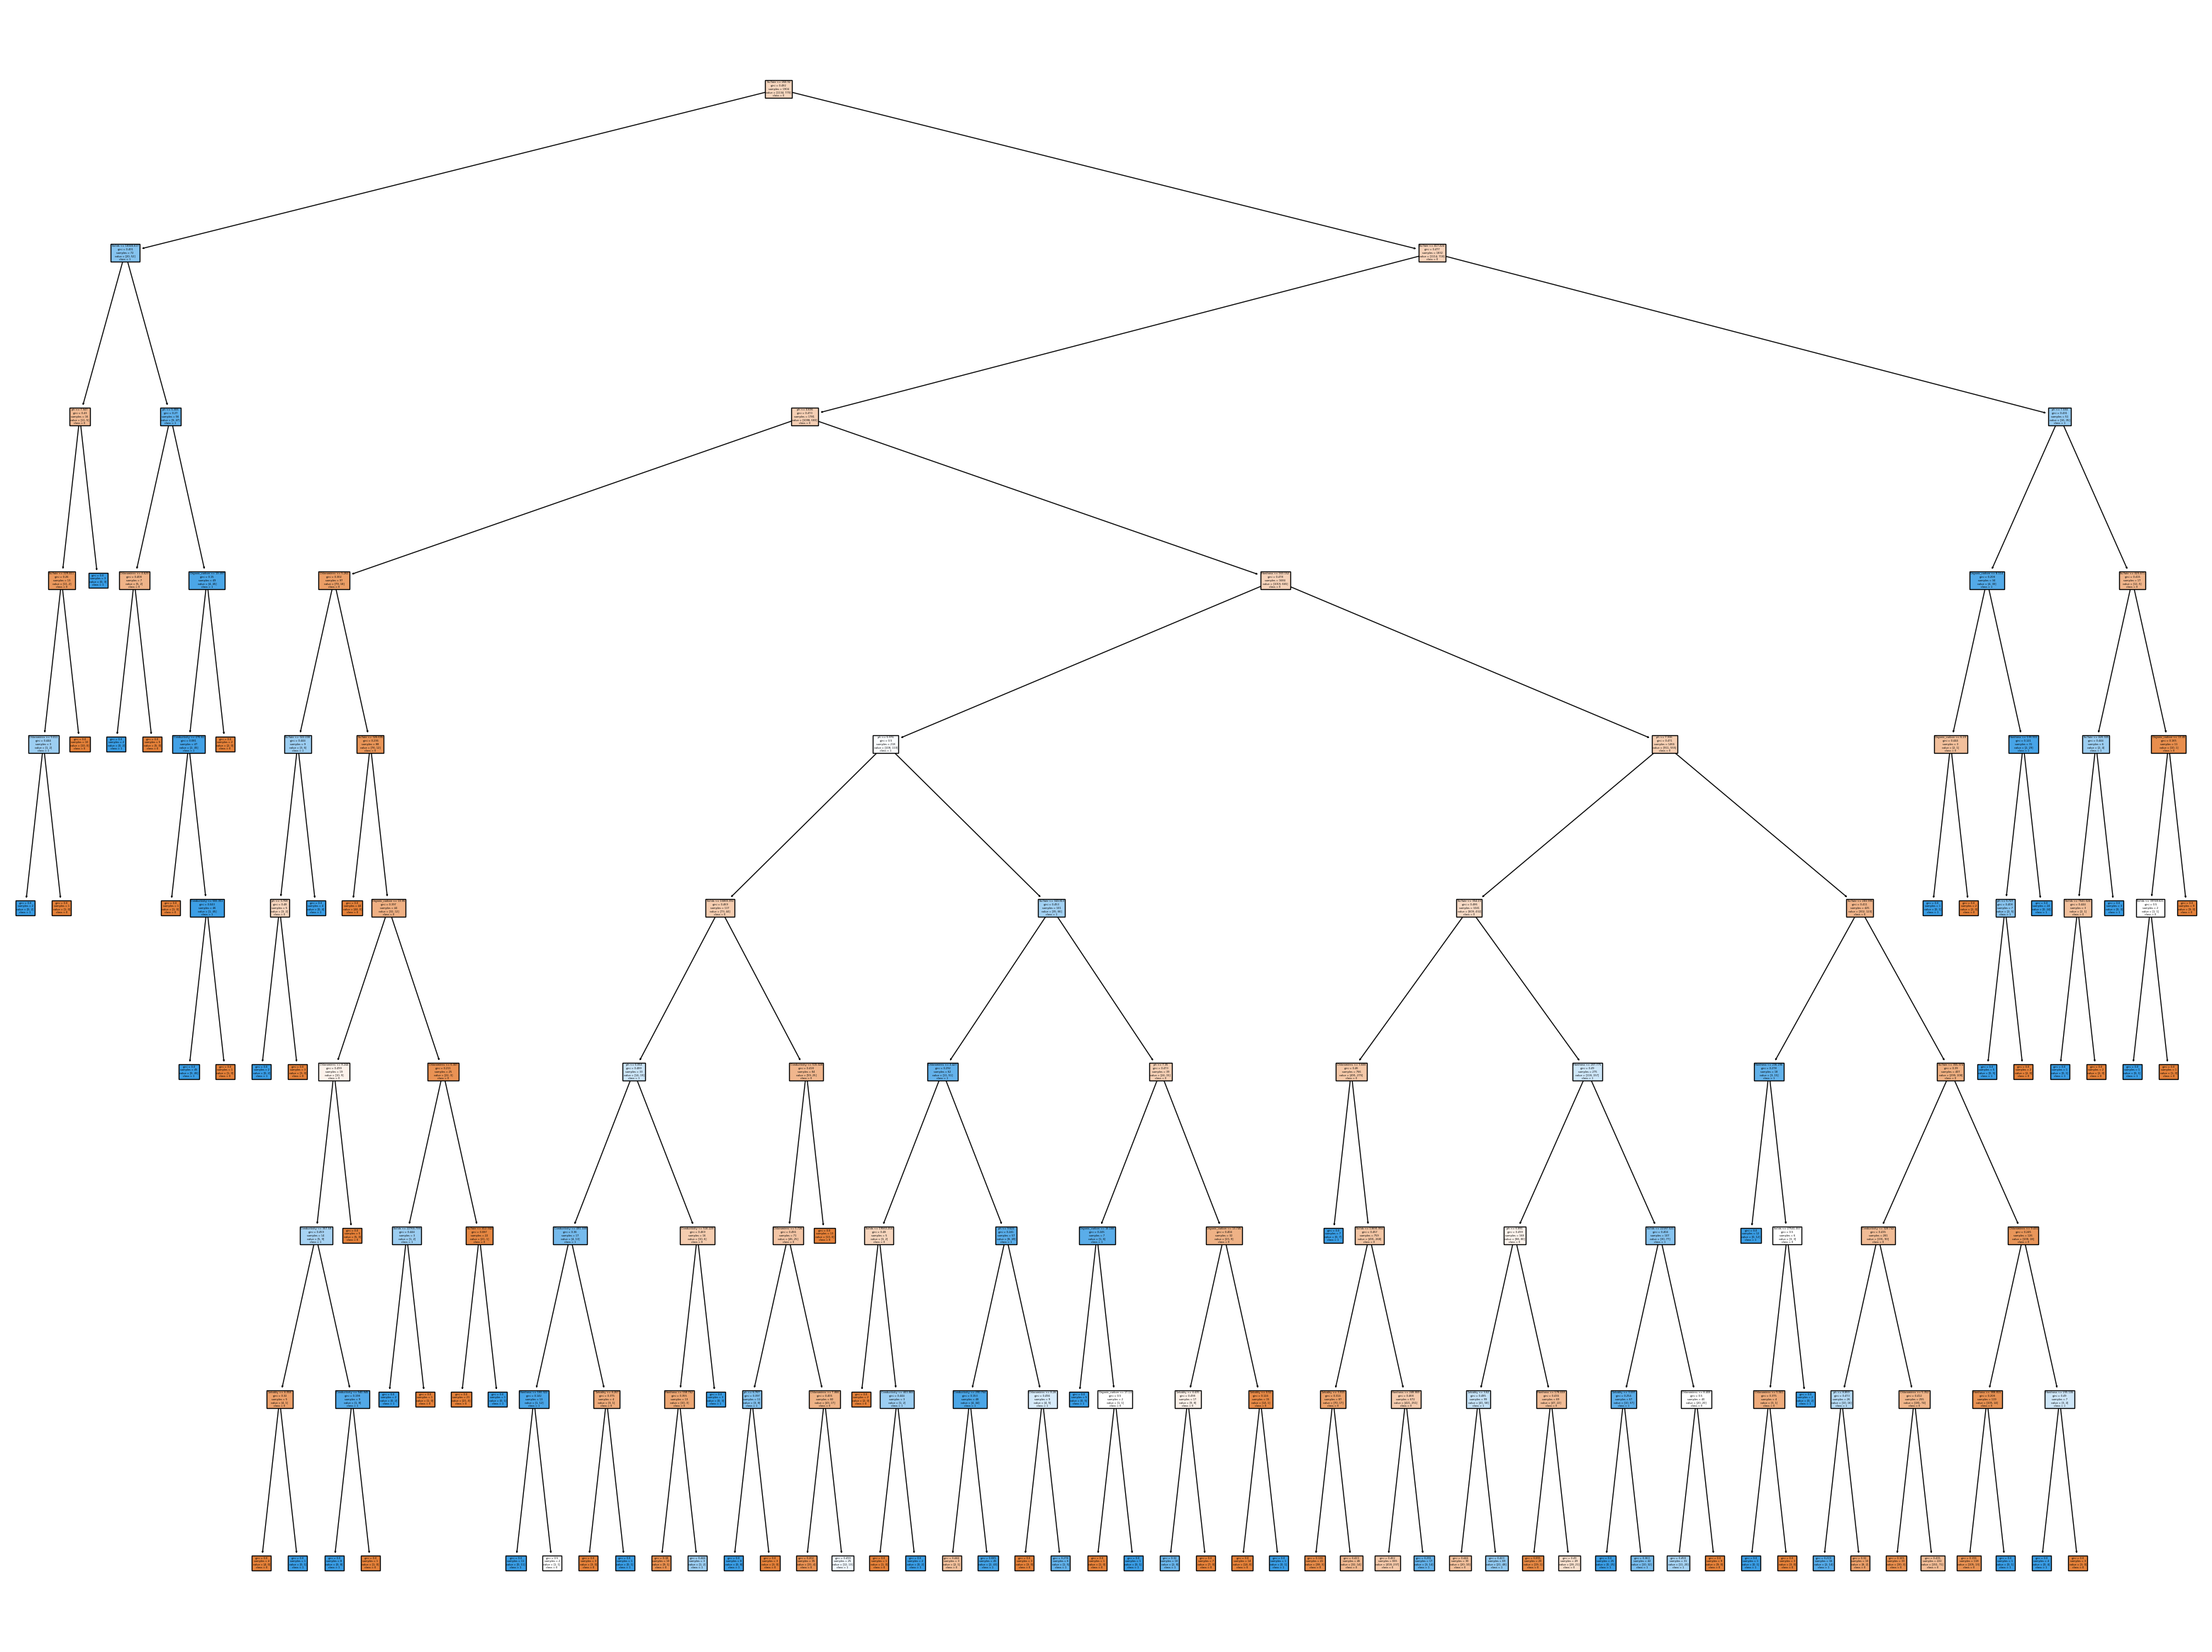

In [101]:

from sklearn import tree
fig = plt.figure(figsize=(40,30))
tree.plot_tree(tree_clf,
             feature_names=list(dt.columns),
             class_names=["0","1"],
             filled=True)
fig.savefig("decision_tree_opt.png")

Despues de multiple prueba y error determinamos que este es el estado idoneo del arbol, agregando mas profundidad no aporta mucha mas informacion, y quitandole, se decanta automaticamente por hacerlo no-potable, por eso vamos a hacer un subsample a los datos, potables para ver como afecta al modelo, y si nos ayuda a destacar las diferencias entre las potables y las no potables (por esa misma razon no hacemos oversample, buscamos diferencias).

el codigo para el oversample se saco de aca: [fuente](https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/)

<Axes: >

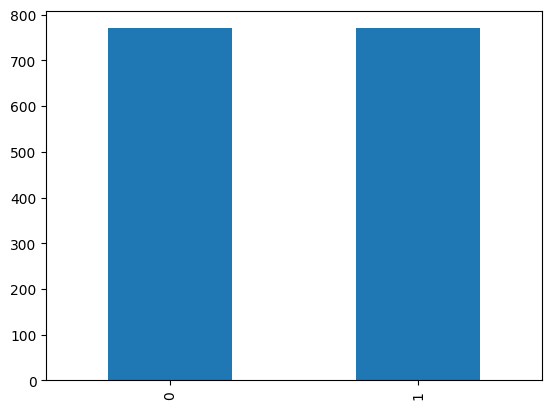

In [131]:
from imblearn.under_sampling import NearMiss
us = NearMiss( n_neighbors=3, version=1) #ejemplo extraido de la fuente de arriba
X_train_res, y_train_res = us.fit_resample(X_train, y_train)
y_train_res.value_counts().plot(kind="bar")

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.70      0.60      0.65       135
           1       0.44      0.56      0.49        77

    accuracy                           0.58       212
   macro avg       0.57      0.58      0.57       212
weighted avg       0.61      0.58      0.59       212



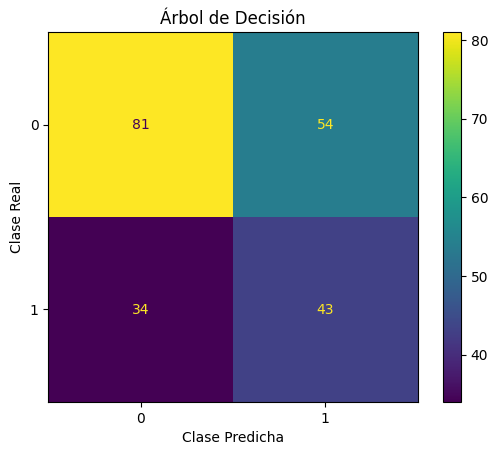

In [132]:
# Entrenamiento
tree_clf = DecisionTreeClassifier(random_state=1, max_depth=15)
tree_clf.fit(X_train_res, y_train_res)

# Predicciones
pred_tree = tree_clf.predict(X_test)
print("Reporte de Clasificación: \n", classification_report(y_test, pred_tree))

# Gráfica de la Matriz de confusión
plot_confusion_matrix(y_test, pred_tree, model_name="Árbol de Decisión")

A pesar de solucionar este problema, el resultado sigue dandonos muy incierto, vamos a probar con el siguiente modelo.

# K vecinos hermanos

En este modelo no hay mucho que ver, los resultados son muy similares a los anteriores

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.64      0.64       135
           1       0.37      0.38      0.37        77

    accuracy                           0.54       212
   macro avg       0.51      0.51      0.51       212
weighted avg       0.54      0.54      0.54       212



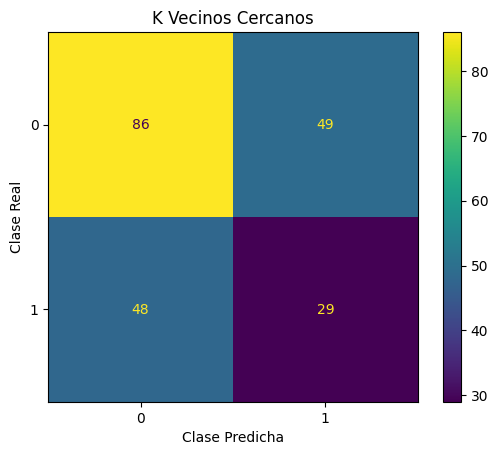

In [137]:
from sklearn.neighbors import KNeighborsClassifier
import time
start = time.time() # Estampa de tiempo para computar métricas

# Entrenamiento
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_knn = knn_clf.predict(X_test)
end_predict = time.time()

print("Classification Report: \n", classification_report(y_test, pred_knn))
plot_confusion_matrix(y_test, pred_knn, model_name="K Vecinos Cercanos")

> Version con los datos balanceados

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.50      0.56       135
           1       0.37      0.51      0.43        77

    accuracy                           0.50       212
   macro avg       0.50      0.51      0.50       212
weighted avg       0.54      0.50      0.51       212



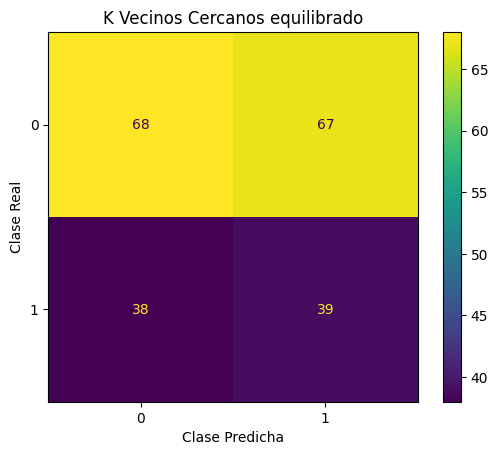

In [140]:
from sklearn.neighbors import KNeighborsClassifier



# Entrenamiento
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_res, y_train_res)


# Predicciones
pred_knn = knn_clf.predict(X_test)


print("Classification Report: \n", classification_report(y_test, pred_knn))
plot_confusion_matrix(y_test, pred_knn, model_name="K Vecinos Cercanos equilibrado")

# neural

Aca el resultado es bastante curioso, en la version sin equilibrar, se va para el lado de la potable, pero, en el equilibrado, indica todo como no potable

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.13      0.22       135
           1       0.38      0.95      0.54        77

    accuracy                           0.42       212
   macro avg       0.60      0.54      0.38       212
weighted avg       0.65      0.42      0.34       212



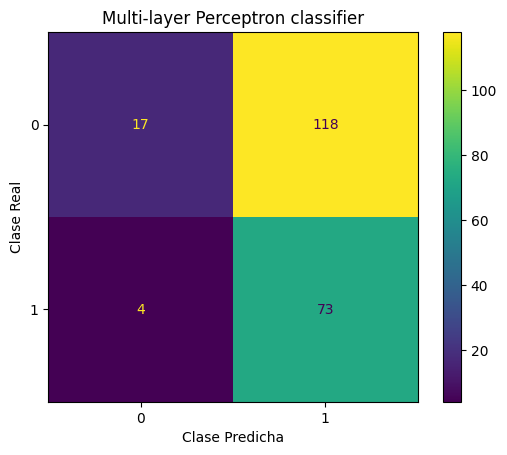

In [144]:
from sklearn.neural_network import MLPClassifier # Multi-layer Perceptron classifier

# Entrenamiento
# Por ahora... un perceptrón multicapa simple, después vemos topologías complejas
nn_clf = MLPClassifier((20,))  # hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
                                # The ith element represents the number of neurons in the ith hidden layer.
nn_clf.fit(X_train, y_train)


# Predicciones
pred_nn = nn_clf.predict(X_test)


print("Classification Report: \n", classification_report(y_test, pred_nn))
plot_confusion_matrix(y_test, pred_nn,  model_name="Multi-layer Perceptron classifier")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       0.64      1.00      0.78       135
           1       0.00      0.00      0.00        77

    accuracy                           0.64       212
   macro avg       0.32      0.50      0.39       212
weighted avg       0.41      0.64      0.50       212



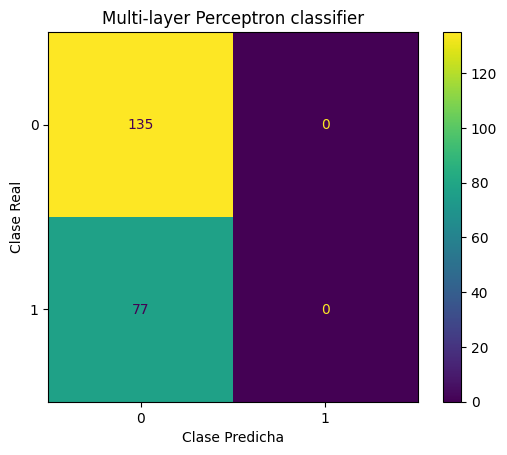

In [145]:
from sklearn.neural_network import MLPClassifier # Multi-layer Perceptron classifier

# Entrenamiento
# Por ahora... un perceptrón multicapa simple, después vemos topologías complejas
nn_clf = MLPClassifier((20,))  # hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
                                # The ith element represents the number of neurons in the ith hidden layer.
nn_clf.fit(X_train_res, y_train_res)


# Predicciones
pred_nn = nn_clf.predict(X_test)


print("Classification Report: \n", classification_report(y_test, pred_nn))
plot_confusion_matrix(y_test, pred_nn,  model_name="Multi-layer Perceptron classifier")

# support vector machine

En este modelo tambien se ve todo el peso en el lado de los no potables, aunque en el modelo equilibrado se ve menos influencia.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       0.64      1.00      0.78       135
           1       0.00      0.00      0.00        77

    accuracy                           0.64       212
   macro avg       0.32      0.50      0.39       212
weighted avg       0.41      0.64      0.50       212



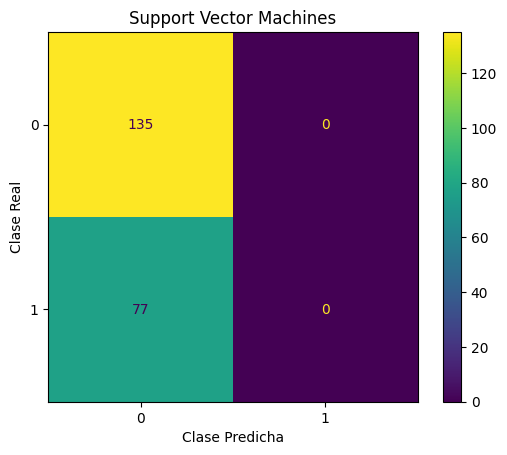

In [147]:
from sklearn.svm import SVC


# Entrenamiento
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Predicciones
pred_svm = svm_clf.predict(X_test)

print("Classification Report: \n", classification_report(y_test, pred_svm))
plot_confusion_matrix(y_test, pred_svm,  model_name="Support Vector Machines")

Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.70      0.65       135
           1       0.31      0.23      0.26        77

    accuracy                           0.53       212
   macro avg       0.46      0.47      0.46       212
weighted avg       0.50      0.53      0.51       212



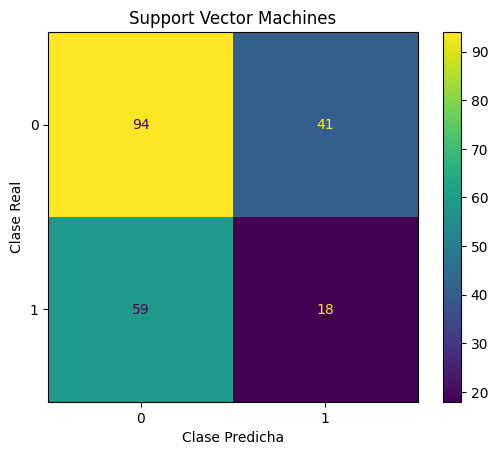

In [148]:
from sklearn.svm import SVC


# Entrenamiento
svm_clf = SVC()
svm_clf.fit(X_train_res, y_train_res)

# Predicciones
pred_svm = svm_clf.predict(X_test)

print("Classification Report: \n", classification_report(y_test, pred_svm))
plot_confusion_matrix(y_test, pred_svm,  model_name="Support Vector Machines")

# random forest

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.73      0.85      0.78       135
           1       0.63      0.44      0.52        77

    accuracy                           0.70       212
   macro avg       0.68      0.65      0.65       212
weighted avg       0.69      0.70      0.69       212



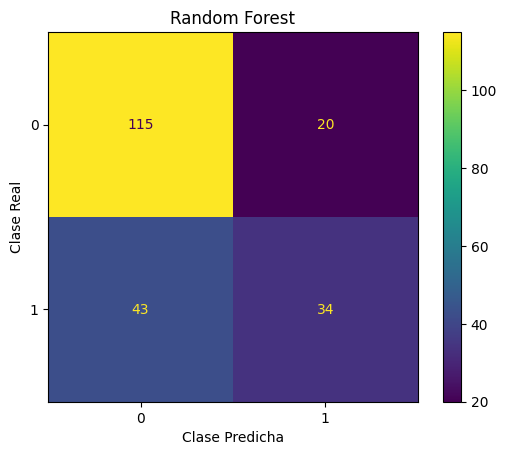

In [152]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar modelo Random Forest
rf_clf = RandomForestClassifier(n_estimators=1000)
rf_clf.fit(X_train, y_train)

# Predicciones
pred_rf = rf_clf.predict(X_test)
print("Reporte de Clasificación: \n", classification_report(y_test, pred_rf))
plot_confusion_matrix(y_test, pred_rf, model_name="Random Forest")

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.77      0.63      0.69       135
           1       0.51      0.68      0.58        77

    accuracy                           0.65       212
   macro avg       0.64      0.65      0.64       212
weighted avg       0.68      0.65      0.65       212



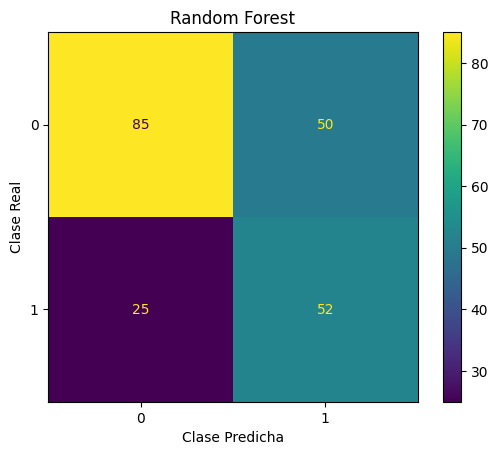

In [153]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar modelo Random Forest
rf_clf = RandomForestClassifier(n_estimators=1000)
rf_clf.fit(X_train_res, y_train_res)

# Predicciones
pred_rf = rf_clf.predict(X_test)
print("Reporte de Clasificación: \n", classification_report(y_test, pred_rf))
plot_confusion_matrix(y_test, pred_rf, model_name="Random Forest")

Reporte de Clasificación: 
               precision    recall  f1-score   support

           0       0.70      0.79      0.75       135
           1       0.53      0.42      0.47        77

    accuracy                           0.66       212
   macro avg       0.62      0.60      0.61       212
weighted avg       0.64      0.66      0.64       212



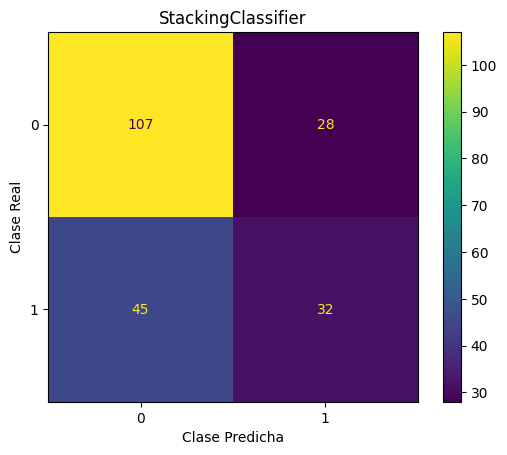

In [155]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Crear modelos base (en este ejemplo, un árbol de decisión, un SVM y un k-NN)
base_model_1 = DecisionTreeClassifier()
base_model_2 = SVC()
base_model_3 = KNeighborsClassifier()

# Crear un StackingClassifier  con los modelos base
stacking_model = StackingClassifier(estimators=[('DT', base_model_1), ('SVM', base_model_2), ('KNN', base_model_3)])

# Entrenar el BaggingClassifier en los datos de entrenamiento
stacking_model.fit(X_train, y_train)

# Predict
y_pred_stm = stacking_model.predict(X_test)
print("Reporte de Clasificación: \n", classification_report(y_test, y_pred_stm))
plot_confusion_matrix(y_test, y_pred_stm,  model_name="StackingClassifier")